In [10]:
import numpy as np
a = np.load("./project_em_particle/all_images.npz")
m = a['arr_0']
images = [m[i, :, :] for i in range(m.shape[0])]
print(len(images))

FileNotFoundError: [Errno 2] No such file or directory: './project_em_particle/all_images.npz'

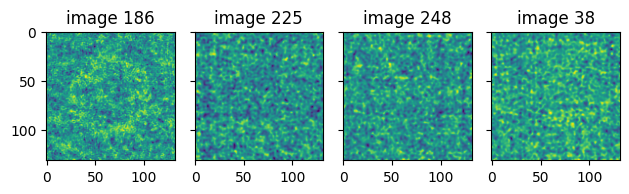

In [3]:
import matplotlib.pyplot as plt
N = 4
fig, axes = plt.subplots(1, N, sharex=True, sharey=True)
Ns = np.random.permutation(np.arange(len(images)))
for ax, i in zip(axes, Ns):
    ax.imshow(images[i])
    ax.set_title(f"image {i}")
fig.tight_layout()
plt.show()

In [4]:
# discriminator code, use this to decide if an image is just noise
mean_image = sum(images) / len(images)
def is_this_a_particle(image):
    return np.corrcoef(image.ravel(), mean_image.ravel())[0,1] > 0

In [5]:
is_this_a_particle(images[186])

True